## Identification.

• Giovana Vieira de Morais - 11921908

• Lucas Batista Gabriel - 7656147



## Name of the dataset
Dataset: City Cellular Traffic Map
URL: https://github.com/caesar0301/city-cellular-traffic-map

## Abstract

The dataset describes in two files (traffic and topology) the hourly traffic per Base Station in some city in China with 1625680 and 13296 records each.

The first File (Traffic) has the number of packets trafficked and the corresponded number of users connected per hour per base station.

In the second file (topology) it is described for each Base Station what is the Latitude and Longitude.

* Traffic trace file (1625680 rows, 5 columns)

> * BS: identity of each cellular base station in this public data.
> * Time_hour: hourly timestamp in UNIX epoch time (time zone GMT+8).
> * Users: the number of active users associated with specific base station and hour.
> * Packets: the number of transferd packets associated with specific base station and hour.
> * Bytes: the number of transferd bytes associated with specific base station and hour.

* Topology file (13296 rows, 3 columns)

> * BS: identity of each cellular base station in this public data.
> * Lon: relative longitude of given base station.
> * Lat: relative latitude of given base station.

## Questions to the dataset

Question 1: How is the topology of the Base Stations?

Question 2: What is the hour in the day with most active users?

Question 3: Which Base Station receives more/less traffic?

Question 4: Which Base Station receives the biggest/smallest packets?



## EDA

The strategy for this dataset will be, through graph visualisation, to group the data using some features of the dataset in order to answer each one of the four questions proposed above.

The main idea is to identify if the dataset has not just enought data but also if the data collected is good.

In [1]:
import random
import pandas as pd
from statistics import mean, median
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import folium
from folium.plugins import MarkerCluster
%matplotlib inline
rcParams['figure.figsize'] = (15, 10)

### Celular Traffic

In [2]:
cellular_traffic_data = pd.read_csv('traceset/cellular_traffic.csv', delimiter = ',', decimal='.')

In [3]:
cellular_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625680 entries, 0 to 1625679
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   bs         1625680 non-null  int64  
 1   time_hour  1625680 non-null  int64  
 2   users      1625680 non-null  int64  
 3   packets    1625680 non-null  int64  
 4   bytes      1625680 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 62.0 MB


In [4]:
cellular_traffic_data.bs.max()

13269

In [5]:
cellular_traffic_data.tail()

bs   time_hour  users  packets        bytes
1625675  7993  1345993200    159    29125   41199852.0
1625676  7995  1345993200    168    24182   36864079.0
1625677  7997  1345993200    190    33781   78226635.0
1625678  7998  1345993200    198    34345  228122304.0
1625679  7999  1345993200    237    36725   67846985.0

In [6]:
cellular_traffic_data.describe()

bs     time_hour         users       packets         bytes
count  1.625680e+06  1.625680e+06  1.625680e+06  1.625680e+06  1.625680e+06
mean   5.372162e+03  1.345643e+09  1.377170e+01  1.724474e+03  8.223766e+06
std    3.060182e+03  1.952034e+05  2.034654e+01  4.600335e+03  1.902086e+08
min    1.000000e+00  1.345306e+09  1.000000e+00  0.000000e+00  0.000000e+00
25%    2.938000e+03  1.345475e+09  2.000000e+00  7.200000e+01  8.074000e+04
50%    5.276000e+03  1.345637e+09  6.000000e+00  4.430000e+02  5.738290e+05
75%    7.528000e+03  1.345806e+09  1.600000e+01  1.695000e+03  2.553905e+06
max    1.326900e+04  1.345993e+09  4.130000e+02  7.945850e+05  1.148665e+11

### Topology

In [7]:
topology_data = pd.read_csv('traceset/topology.csv', delimiter = ',', decimal='.')

In [8]:
topology_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13269 entries, 0 to 13268
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bs      13269 non-null  int64  
 1   lon     13269 non-null  float64
 2   lat     13269 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 311.1 KB


In [9]:
topology_data.head()

bs         lon        lat
0   1  111.247626  13.161971
1   2  111.209676  13.288072
2   3  111.210788  13.295707
3   4  111.203125  13.290818
4   5  111.215505  13.281345

In [10]:
topology_data.tail()

bs         lon        lat
13264  13265  111.063918  13.198752
13265  13266  111.066573  13.039694
13266  13267  111.065121  13.107543
13267  13268  111.196631  13.205329
13268  13269  111.036413  13.168402

In [11]:
topology_data.describe()

bs           lon           lat
count  13269.000000  13269.000000  13269.000000
mean    6635.000000    111.083635     13.147439
std     3830.574696      0.063283      0.063965
min        1.000000    110.951698     13.004320
25%     3318.000000    111.043553     13.111423
50%     6635.000000    111.075527     13.148746
75%     9952.000000    111.111813     13.185112
max    13269.000000    111.248901     13.353194

# Question 1: How is the topology of the Base Stations?

## Map visualization

Since we have 13269 base stations in our map, visualization can get a little difficult.
To solve that and to make computation faster, we will show our data with clusters.
Each cluster is marked with the quantity of base stations inside. Click to zoom inside that cluster.

The "swept the real longitudes and latitudes before publishing the data because we were banned by the privacy protocol in the research". So we can't visualize our topology data clearly.

In [12]:
topology_data.count()

bs     13269
lon    13269
lat    13269
dtype: int64

In [13]:
BBox = ((topology_data.lon.min(),   topology_data.lon.max(),      
         topology_data.lat.min(), topology_data.lat.max()))
BBox

(110.951698, 111.248901, 13.004319500000001, 13.3531938)

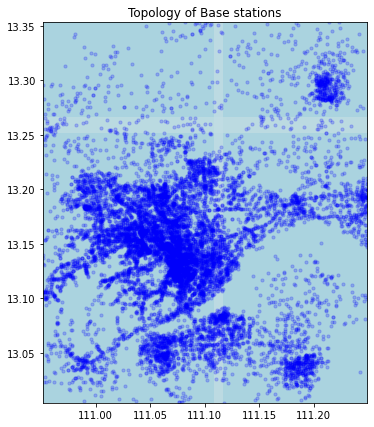

In [14]:
ruh_m = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(topology_data.lon, topology_data.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Topology of Base stations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### Clustered base station

In [15]:
# click to open the markers and visualize the base stations
mc = MarkerCluster()

cluster_map = folium.Map(location = [topology_data['lat'].mean(), topology_data['lon'].mean()],
                 title = 'Clustered base station')

for i in range(0, len(topology_data)):
    mc.add_child(folium.Marker([topology_data.iloc[i]['lat'], topology_data.iloc[i]['lon']]))
    
cluster_map.add_child(mc)

cluster_map

# Question 2: What is the hour in the day with most active users?

In [16]:
cellular_traffic_data['time_hour'] = cellular_traffic_data['time_hour'].map(lambda x: pd.Timestamp(x, unit='s', tz='Asia/Shanghai'))
cellular_traffic_data['hour'] = cellular_traffic_data['time_hour'].map(lambda x: x.hour)
cellular_traffic_data['day'] = cellular_traffic_data['time_hour'].map(lambda x: x.day)

In [17]:
total_hour_traffic = cellular_traffic_data.groupby(['hour']).mean()

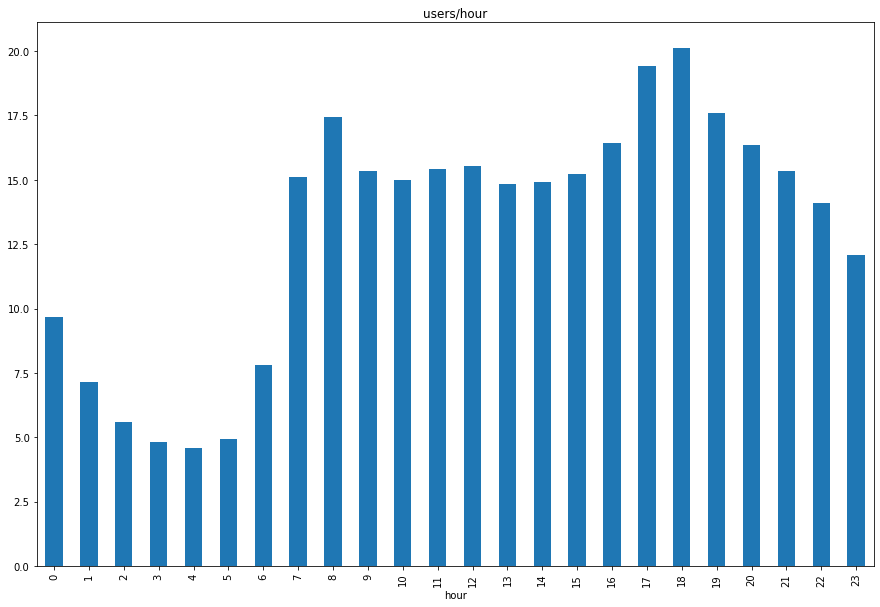

In [18]:
total_hour_traffic['users'].plot(kind='bar', title='users/hour')

We can see that 7PM has the highest mean, followed by 6PM. But it doesn't mean that the same hours have the 
the highest packets quantity as we can see below. 

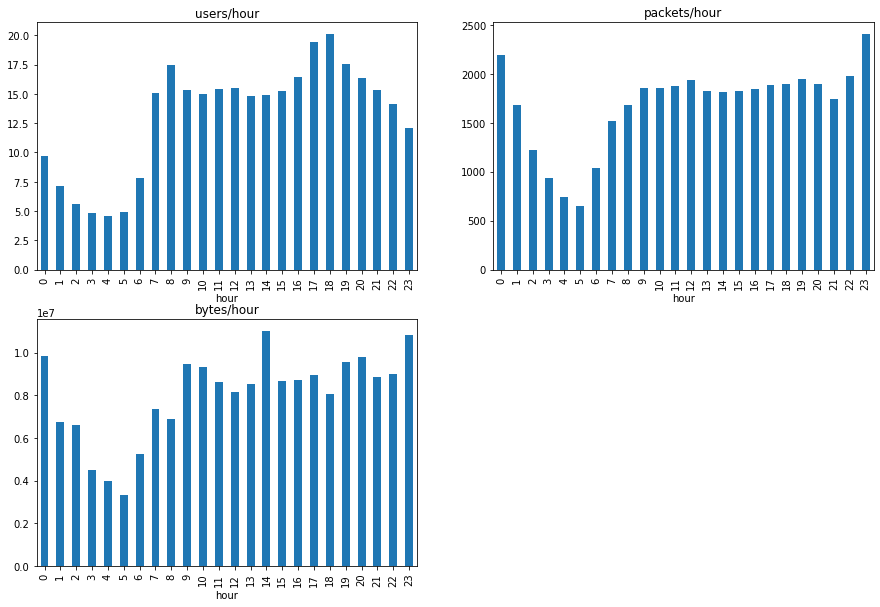

In [19]:
plt.subplot(2,2,1)
total_hour_traffic['users'].plot(kind='bar', title='users/hour')
plt.subplot(2,2,2)
total_hour_traffic['packets'].plot(kind='bar', title='packets/hour')
plt.subplot(2,2,3)
total_hour_traffic['bytes'].plot(kind='bar', title='bytes/hour')

So now we can see that the highest packet traffic occurs at 11PM and 12PM. The largest packets (the ones with more
bytes) are traveling at 2PM and 11PM.

# Base Station Analysis

## Question 3: Which Base Station receives more/less traffic?

## Question 4: Which Base Station receives the biggest/smallest packets?

### To answer this question, we have to consider some scenarios:

#### Looking for all days

- What's the Packet distribution per base station
- The maximum/minimum packet trafficked in each Base Station
- The largest/smallest number of bytes trafficked in each Base station

#### Looking each day

- What's the BS that has more users connected at the same time (per hour and per day)?
- What's the BS that has more packets (per hour and per day)?
- What's the BS that has the largest packets (per hour and per day)?



## All Days

### Packet distribution per base station

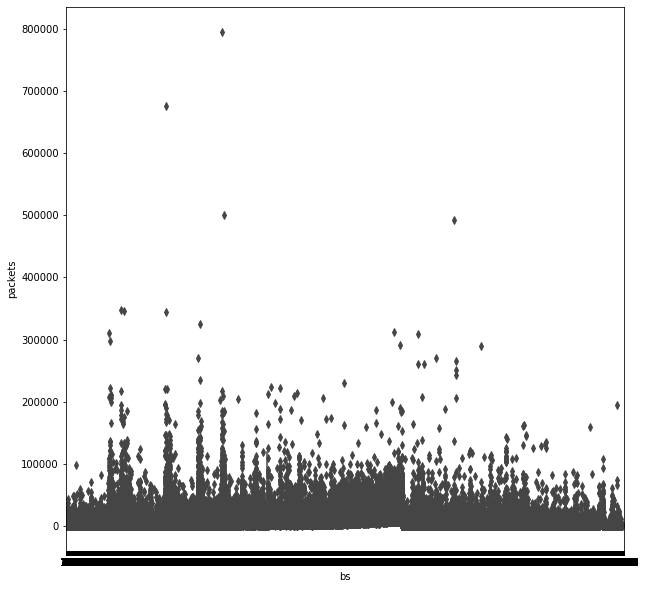

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x='bs', y='packets', data= cellular_traffic_data)

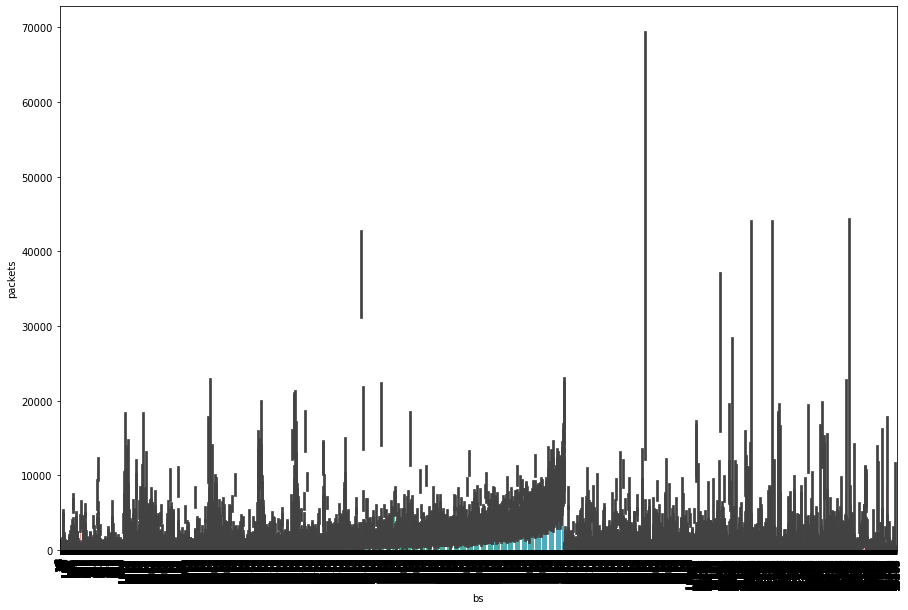

In [21]:
sns.barplot(x = cellular_traffic_data['bs'], y = cellular_traffic_data['packets'], estimator = mean)
plt.rcParams['figure.figsize'] = (10,7)
plt.xticks(rotation = 90)
plt.show() 

### Max Per Base station

In [20]:
cellular_traffic_data.groupby('bs').packets.max()

bs
1         2588
2        19251
3         2428
4         2887
5          378
         ...  
13265        1
13266        1
13267        0
13268       26
13269        4
Name: packets, Length: 13269, dtype: int64

### Min Per Base station

In [21]:
cellular_traffic_data.groupby('bs').packets.min()

bs
1         0
2         0
3         1
4         1
5         0
         ..
13265     1
13266     1
13267     0
13268    26
13269     4
Name: packets, Length: 13269, dtype: int64

## Bytes distribution per Base Station

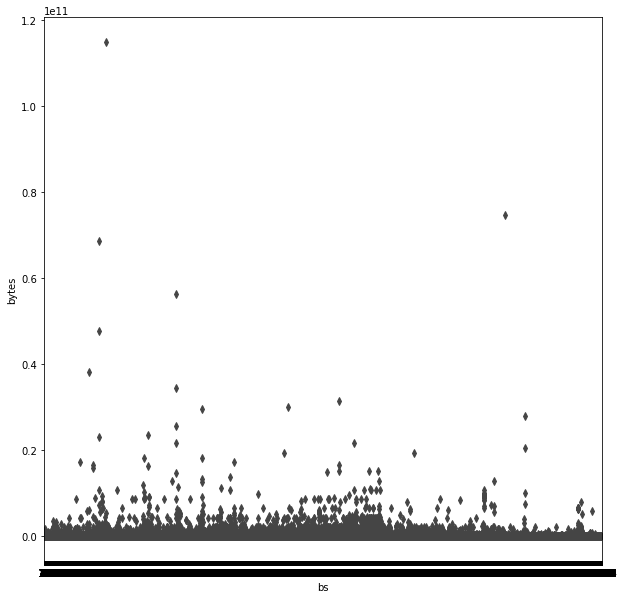

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(x='bs', y='bytes', data= cellular_traffic_data)

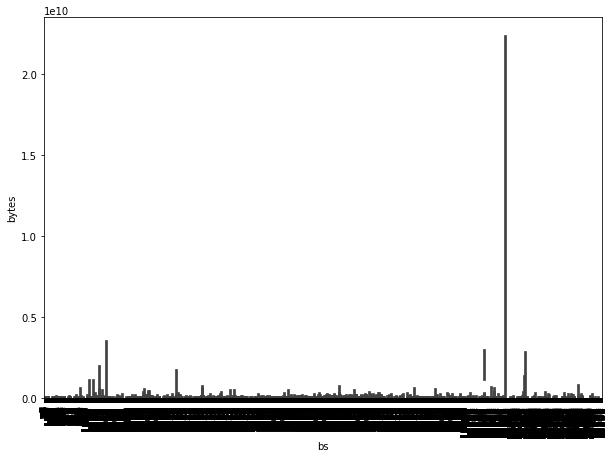

In [25]:
sns.barplot(x = cellular_traffic_data['bs'], y = cellular_traffic_data['bytes'], estimator = mean)
plt.rcParams['figure.figsize'] = (10,7)
plt.xticks(rotation = 90)
plt.show() 

### Max Per Base station

In [22]:
cellular_traffic_data.groupby('bs').bytes.max()

bs
1        13331620.0
2        49370807.0
3        17527474.0
4        23494982.0
5          524377.0
            ...    
13265          13.0
13266         216.0
13267           0.0
13268       41028.0
13269         608.0
Name: bytes, Length: 13269, dtype: float64

### Min Per Base station

In [23]:
cellular_traffic_data.groupby('bs').bytes.min()

bs
1            0.0
2            0.0
3            0.0
4            0.0
5            0.0
          ...   
13265       13.0
13266      216.0
13267        0.0
13268    41028.0
13269      608.0
Name: bytes, Length: 13269, dtype: float64

## Traffic distribution Per day

In [24]:
day_traffic_data = cellular_traffic_data.groupby(['bs', 'day']).mean()
day_traffic_data

users     packets          bytes       hour
bs    day                                                
1     19   2.769231   95.461538  110790.923077  13.230769
      20   3.000000  222.157895  350723.526316  14.000000
      21   3.842105  402.263158  742965.631579  13.842105
      22   3.714286  328.095238  495277.666667  12.571429
      23   3.318182  125.681818  145457.727273  12.272727
...             ...         ...            ...        ...
13265 26   1.000000    1.000000      13.000000  17.000000
13266 26   1.000000    1.000000     216.000000  19.000000
13267 26   1.000000    0.000000       0.000000  19.000000
13268 26   1.000000   26.000000   41028.000000  20.000000
13269 26   1.000000    4.000000     608.000000  22.000000

[96258 rows x 4 columns]

In [25]:
max_data = day_traffic_data.idxmax()
min_data = day_traffic_data.idxmin()

So, as we see below, the BS with more users at the same time is **BS 7999** and the traffic peak occurred on 
August 20th, when aprox. 199 users were connected. There are several BS that have the lowest user rate (1 user) 
connected at the same time.

In [26]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == max_data.users[0]) &
                 (day_traffic_data.index.get_level_values('day') == max_data.users[1])]

users    packets         bytes  hour
bs   day                                      
7999 20   189.5  25387.375  8.649183e+07  11.5

In [27]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == min_data.users[0]) &
                 (day_traffic_data.index.get_level_values('day') == min_data.users[1])]

users  packets    bytes  hour
bs day                               
5  19     1.0     26.6  20165.0  11.0

The BS with more packets was **BS 9286**, that had aprox 162995 packets in a single day on August 26th. The BS with less packets was **BS 516** with 0 packets. This may or may not be due some error (we'll investigate further).

In [28]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == max_data.packets[0]) &
                 (day_traffic_data.index.get_level_values('day') == max_data.packets[1])]

users        packets         bytes  hour
bs   day                                          
9286 26     1.0  162995.142857  1.189056e+09   3.0

In [29]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == min_data.packets[0]) &
                 (day_traffic_data.index.get_level_values('day') == min_data.packets[1])]

users  packets  bytes  hour
bs  day                             
516 25     1.0      0.0    0.0  21.0

The BS with the largest packets in a hour was **BS10955** that 3.726662e+10 bytes on August 21th. The BS with the lowest package was **BS 277** with one package of 0 bytes.

In [30]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == max_data.bytes[0]) &
                 (day_traffic_data.index.get_level_values('day') == max_data.bytes[1])]

users  packets         bytes  hour
bs    day                                    
10955 21     2.0  73037.5  3.726662e+10   9.5

In [31]:
day_traffic_data[(day_traffic_data.index.get_level_values('bs') == min_data.bytes[0]) &
                 (day_traffic_data.index.get_level_values('day') == min_data.bytes[1])]

users  packets  bytes  hour
bs  day                             
277 19     1.0      1.0    0.0   0.0

In [81]:
## plotting a map with those three max bs to check how close they are
bs_info = {
    "most_user_access": max_data.users[0],
    "most_bytes": max_data.bytes[0],
    "most_packets": max_data.packets[0]
}

bs = []
for bs_index in max_data:
    bs.append(bs_index[0])

max_day_map = folium.Map(location = [topology_data.iloc[bs]['lat'].mean(), topology_data.iloc[bs]['lon'].mean()],
                 title = 'base station with max data per day')

for i in bs_info:
    print(f"base station index of {i}: {bs_info[i]}")
    folium.Marker(location = [topology_data.iloc[bs_info[i]]['lat'], 
                              topology_data.iloc[bs_info[i]]['lon']],
                 tooltip = i).add_to(max_day_map)
    
max_day_map

base station index of most_user_access: 7999
base station index of most_bytes: 10955
base station index of most_packets: 9286


In [82]:
bs_info

{'most_user_access': 7999, 'most_bytes': 10955, 'most_packets': 9286}

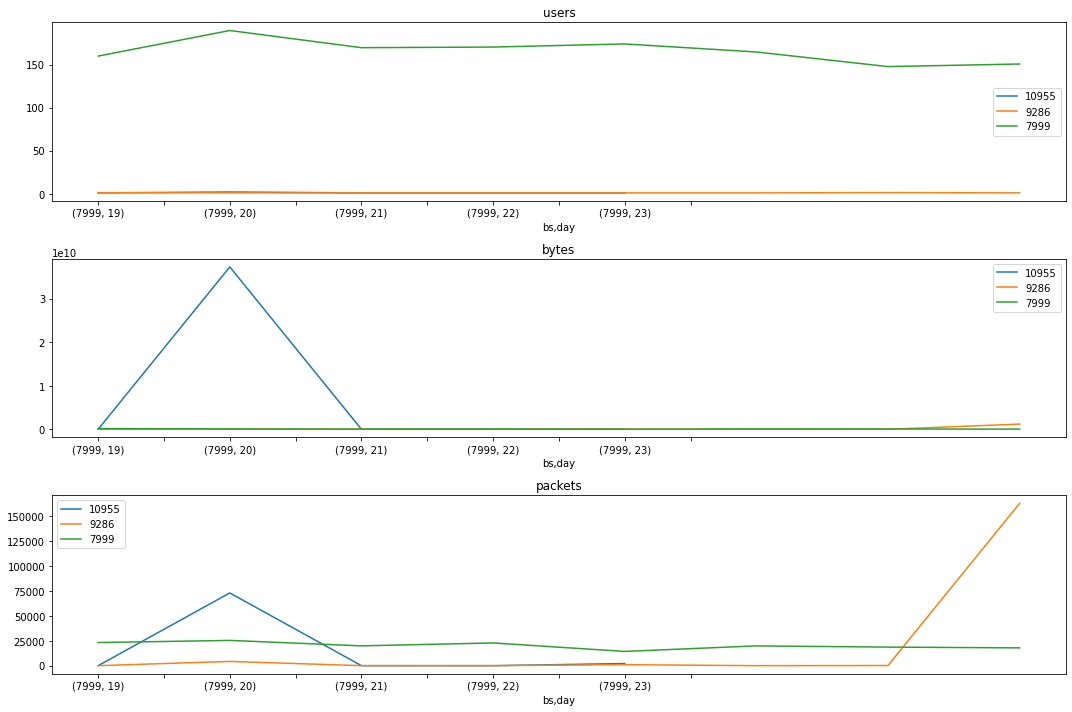

In [34]:
plt.subplot(3,1,1)
plt.title(f"users")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['users'].plot(label=bs_info['most_bytes'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['users'].plot(label=bs_info['most_packets'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['users'].plot(label=bs_info['most_user_access'])
plt.legend()


plt.subplot(3,1,2)
plt.title(f"bytes")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['bytes'].plot(label=bs_info['most_bytes'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['bytes'].plot(label=bs_info['most_packets'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['bytes'].plot(label=bs_info['most_user_access'])
plt.legend()

plt.subplot(3,1,3)
plt.title(f"packets")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['packets'].plot(label=bs_info['most_bytes'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['packets'].plot(label=bs_info['most_packets'])
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['packets'].plot(label=bs_info['most_user_access'])

plt.legend()

plt.tight_layout()

In [35]:
day_traffic_data[day_traffic_data.index.get_level_values('bs') == 1].corr()

users   packets     bytes      hour
users    1.000000  0.437507 -0.322274  0.365065
packets  0.437507  1.000000  0.561259  0.523935
bytes   -0.322274  0.561259  1.000000  0.539563
hour     0.365065  0.523935  0.539563  1.000000

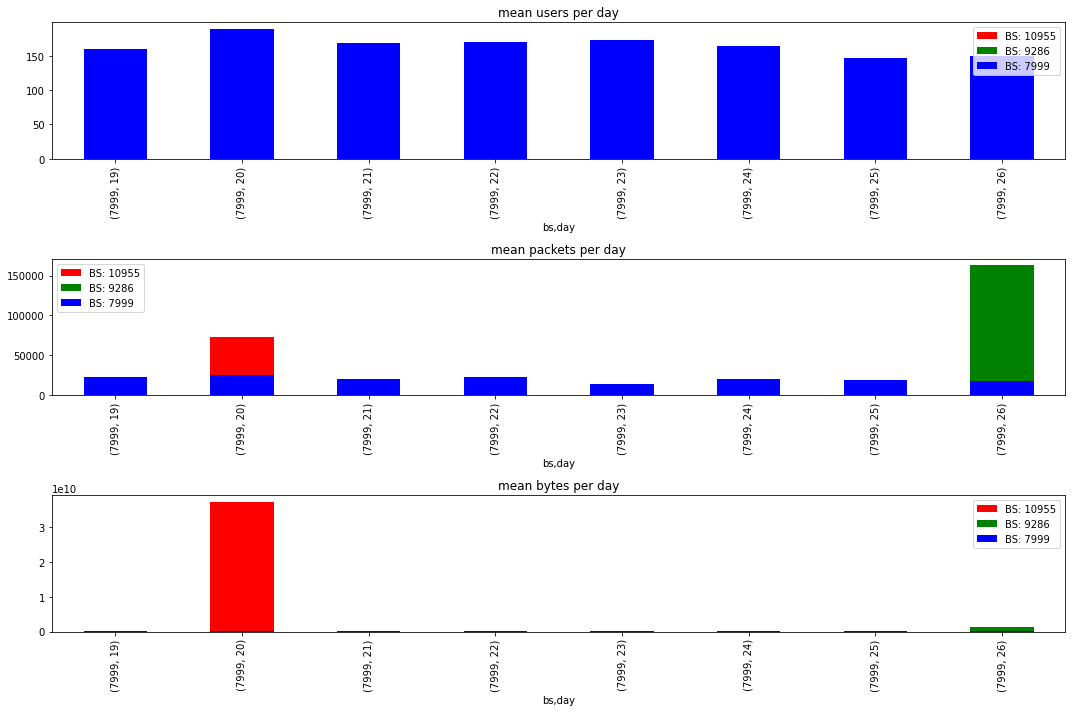

In [36]:
# exemplo de distribuição pra 2 estações diferentes
plt.subplot(3,1,1)
plt.title("mean users per day")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['users'].plot.bar(color='r', label = f"BS: {bs_info['most_bytes']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['users'].plot.bar(color='g', label = f"BS: {bs_info['most_packets']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['users'].plot.bar(color='b', label = f"BS: {bs_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,2)
plt.title("mean packets per day")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['packets'].plot.bar(color='r', label=f"BS: {bs_info['most_bytes']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['packets'].plot.bar(color='g', label=f"BS: {bs_info['most_packets']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['packets'].plot.bar(color='b', label=f"BS: {bs_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,3)
plt.title("mean bytes per day")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_bytes']]['bytes'].plot.bar(color='r', label=f"BS: {bs_info['most_bytes']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_packets']]['bytes'].plot.bar(color='g', label=f"BS: {bs_info['most_packets']}")
day_traffic_data[day_traffic_data.index.get_level_values('bs') == bs_info['most_user_access']]['bytes'].plot.bar(color='b', label=f"BS: {bs_info['most_user_access']}")
plt.legend()

plt.tight_layout()

## Per hour

In [37]:
hour_traffic_data = cellular_traffic_data.groupby(['bs', 'hour']).mean()
hour_traffic_data

users    packets         bytes    day
bs    hour                                          
1     0     1.250000  53.000000  54483.000000  22.50
      1     1.333333  21.666667  20593.666667  24.00
      2     1.250000  86.500000  92736.750000  23.50
      3     1.500000  58.750000  66064.250000  22.75
      4     1.000000  16.750000  18772.500000  23.50
...              ...        ...           ...    ...
13265 17    1.000000   1.000000     13.000000  26.00
13266 19    1.000000   1.000000    216.000000  26.00
13267 19    1.000000   0.000000      0.000000  26.00
13268 20    1.000000  26.000000  41028.000000  26.00
13269 22    1.000000   4.000000    608.000000  26.00

[269527 rows x 4 columns]

In [38]:
max_hour = hour_traffic_data.idxmax()

We can see that, among all 24 hours, the BS with more users connected at the same hour was **BS 7846** at 8AM.

In [39]:
hour_traffic_data[(hour_traffic_data.index.get_level_values('bs') == max_hour.users[0]) &
                 (hour_traffic_data.index.get_level_values('hour') == max_hour.users[1])]

users    packets         bytes   day
bs   hour                                        
7846 8     301.875  13758.375  1.846582e+08  22.5

The BS with more packets travelling was **BS 9286**, with a mean value of 251072 packets travelling at 2AM.

In [40]:
hour_traffic_data[(hour_traffic_data.index.get_level_values('bs') == max_hour.packets[0]) &
                 (hour_traffic_data.index.get_level_values('hour') == max_hour.packets[1])]

users   packets         bytes   day
bs   hour                                     
9286 2       1.0  251072.0  1.619578e+09  26.0

The BS with the largest packages travelling per hour was **BS 10955** with 3.726652e+10 bytes at 9AM.

In [41]:
hour_traffic_data[(hour_traffic_data.index.get_level_values('bs') == max_hour.bytes[0]) &
                 (hour_traffic_data.index.get_level_values('hour') == max_hour.bytes[1])]

users  packets         bytes   day
bs    hour                                    
10955 9       1.5  72910.5  3.726652e+10  23.0

In [42]:
bs_hour_info = {
    "most_user_access": max_hour.users[0],
    "most_bytes": max_hour.bytes[0],
    "most_packets": max_hour.packets[0]
}

bs_hour_info

{'most_user_access': 7846, 'most_bytes': 10955, 'most_packets': 9286}

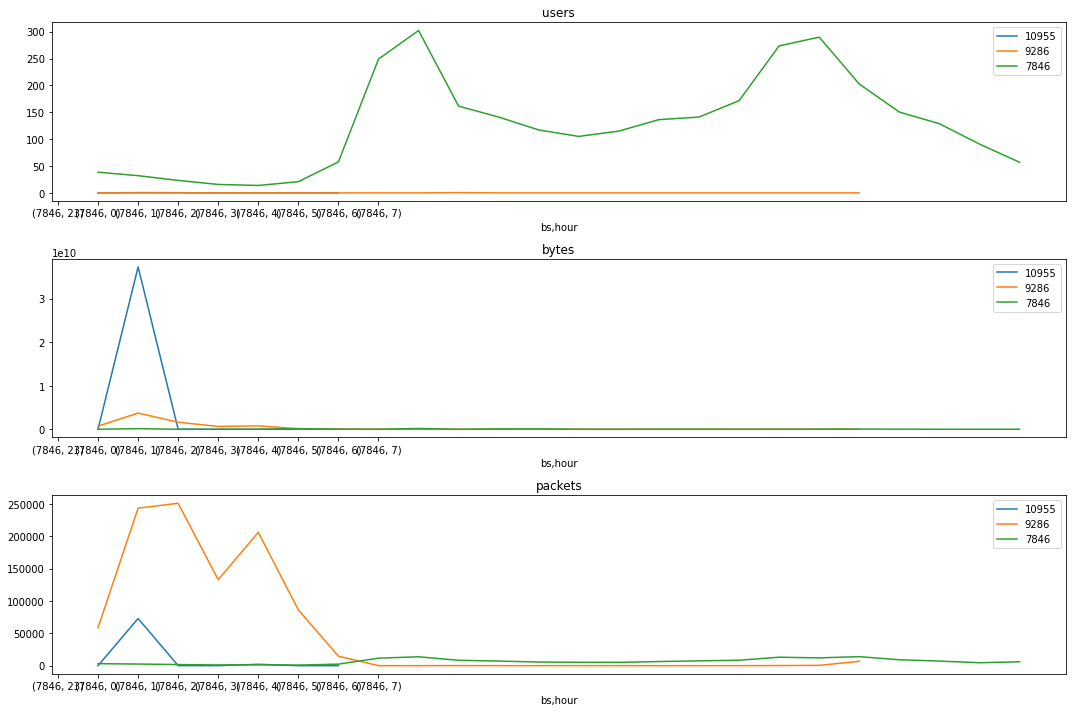

In [43]:
plt.subplot(3,1,1)
plt.title(f"users")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['users'].plot(label=bs_hour_info['most_bytes'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['users'].plot(label=bs_hour_info['most_packets'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['users'].plot(label=bs_hour_info['most_user_access'])
plt.legend()


plt.subplot(3,1,2)
plt.title(f"bytes")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['bytes'].plot(label=bs_hour_info['most_bytes'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['bytes'].plot(label=bs_hour_info['most_packets'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['bytes'].plot(label=bs_hour_info['most_user_access'])
plt.legend()

plt.subplot(3,1,3)
plt.title(f"packets")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['packets'].plot(label=bs_hour_info['most_bytes'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['packets'].plot(label=bs_hour_info['most_packets'])
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['packets'].plot(label=bs_hour_info['most_user_access'])

plt.legend()

plt.tight_layout()

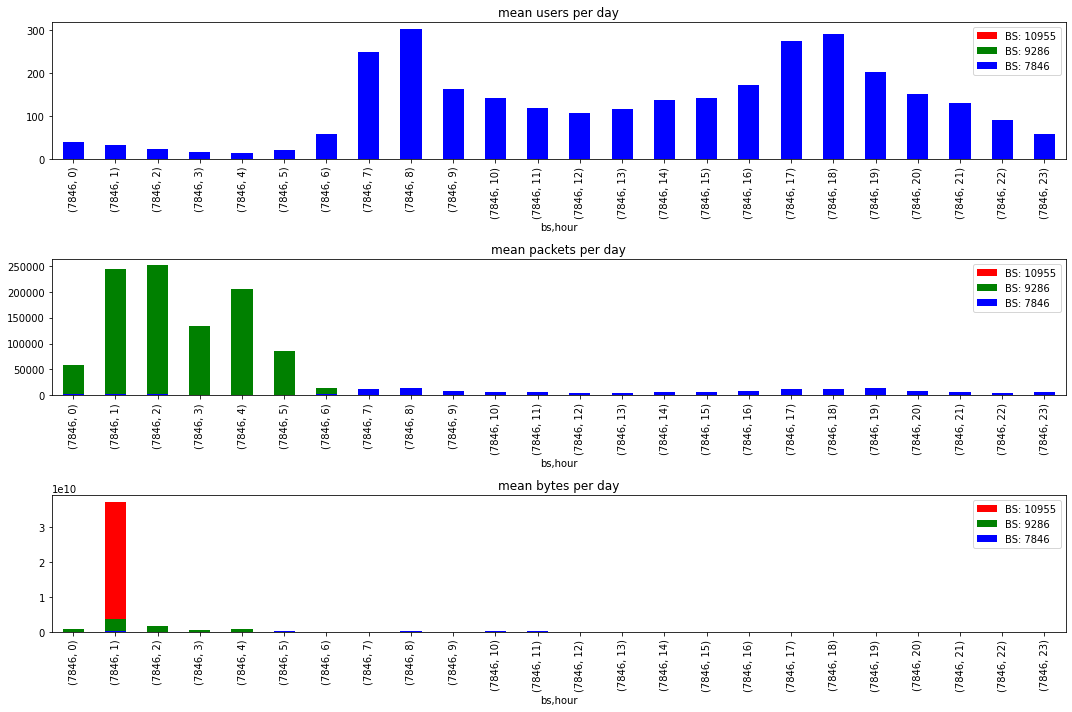

In [44]:
# exemplo de distribuição pra 2 estações diferentes
plt.subplot(3,1,1)
plt.title("mean users per day")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['users'].plot.bar(color='r', label = f"BS: {bs_hour_info['most_bytes']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['users'].plot.bar(color='g', label = f"BS: {bs_hour_info['most_packets']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['users'].plot.bar(color='b', label = f"BS: {bs_hour_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,2)
plt.title("mean packets per day")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['packets'].plot.bar(color='r', label=f"BS: {bs_hour_info['most_bytes']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['packets'].plot.bar(color='g', label=f"BS: {bs_hour_info['most_packets']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['packets'].plot.bar(color='b', label=f"BS: {bs_hour_info['most_user_access']}")
plt.legend()

plt.subplot(3,1,3)
plt.title("mean bytes per day")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_bytes']]['bytes'].plot.bar(color='r', label=f"BS: {bs_hour_info['most_bytes']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_packets']]['bytes'].plot.bar(color='g', label=f"BS: {bs_hour_info['most_packets']}")
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == bs_hour_info['most_user_access']]['bytes'].plot.bar(color='b', label=f"BS: {bs_hour_info['most_user_access']}")
plt.legend()

plt.tight_layout()

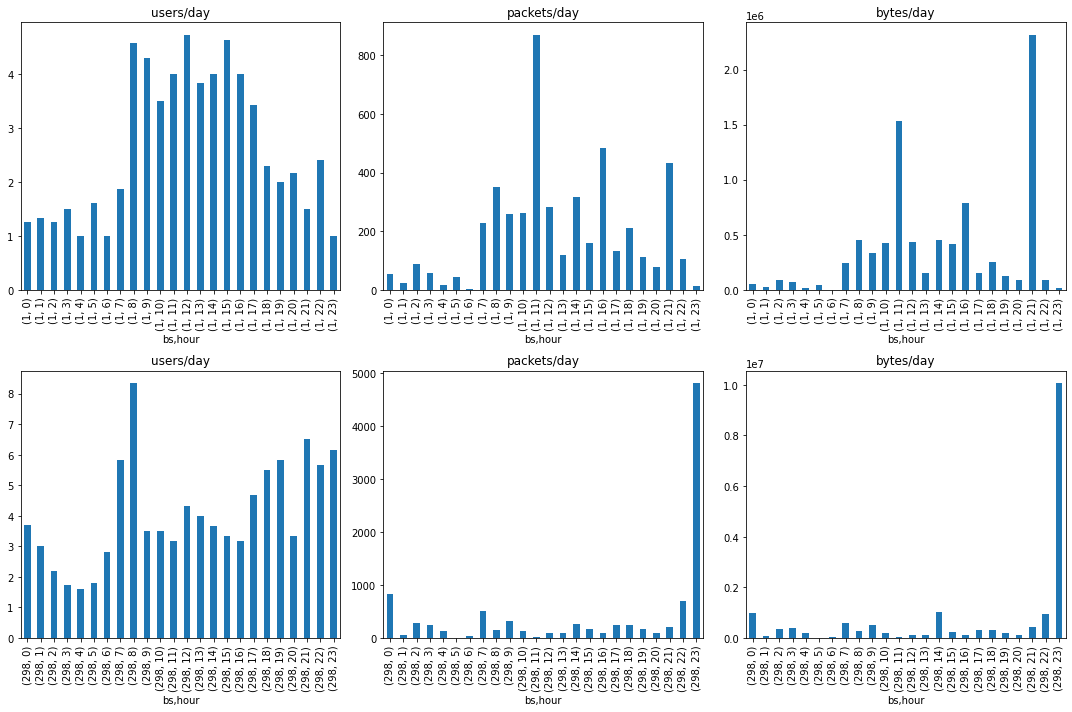

In [45]:
# exemplo de distribuição pra 2 estações diferente
plt.subplot(2,3,1)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 1]['users'].plot(kind='bar', title='users/day')
plt.subplot(2,3,2)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 1]['packets'].plot(kind='bar', title='packets/day')
plt.subplot(2,3,3)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 1]['bytes'].plot(kind='bar', title='bytes/day')

plt.subplot(2,3,4)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 298]['users'].plot(kind='bar', title='users/day')
plt.subplot(2,3,5)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 298]['packets'].plot(kind='bar', title='packets/day')
plt.subplot(2,3,6)
hour_traffic_data[hour_traffic_data.index.get_level_values('bs') == 298]['bytes'].plot(kind='bar', title='bytes/day')

plt.tight_layout()

# Is there any missing data?

Yes. Some of the base stations doesn't have all of the hours or even days with the measures of users, packets, bytes etc.

In [46]:
cellular_traffic_data[cellular_traffic_data['bs'] == 10955]

bs                 time_hour  users  packets         bytes  hour  \
76110    10955 2012-08-19 10:00:00+08:00      1        6  7.206000e+03    10   
483092   10955 2012-08-21 09:00:00+08:00      2   145801  7.453302e+10     9   
492954   10955 2012-08-21 10:00:00+08:00      2      274  2.070180e+05    10   
1103282  10955 2012-08-24 07:00:00+08:00      1       64  6.131600e+04     7   
1131801  10955 2012-08-24 10:00:00+08:00      1       12  1.320400e+04    10   
1229613  10955 2012-08-24 20:00:00+08:00      1        7  8.494000e+03    20   
1325507  10955 2012-08-25 09:00:00+08:00      1       20  2.314400e+04     9   
1359289  10955 2012-08-25 13:00:00+08:00      1       18  2.146000e+04    13   
1384137  10955 2012-08-25 16:00:00+08:00      1       13  1.446100e+04    16   
1546962  10955 2012-08-26 14:00:00+08:00      1     2167  2.724601e+06    14   

         day  
76110     19  
483092    21  
492954    21  
1103282   24  
1131801   24  
1229613   24  
1325507   25  
1359289   25  
1384137   25  
1546962   26

# Conclusions

What we could observate at the dataset is that we have some missing points that we couldn't explain if it was collection mistake or if there was no traffic at that point.

Another point that was noticed is that the topology does not correspond to the topology described by the authors. So, it was very hard to have any conclusions about the real traffic and if, for example, it had any special event during the collected days that gave any bias to the dataset.

In [63]:
cellular_traffic_data[(cellular_traffic_data['bs'] == 1) & (cellular_traffic_data['day'] == 19)]

bs                 time_hour  users  packets     bytes  hour  day
0        1 2012-08-19 00:00:00+08:00      1        3    3473.0     0   19
59405    1 2012-08-19 08:00:00+08:00      4       25    3948.0     8   19
68618    1 2012-08-19 09:00:00+08:00      4      196  253027.0     9   19
86792    1 2012-08-19 11:00:00+08:00      3      318  408036.0    11   19
97876    1 2012-08-19 12:00:00+08:00      6      473  532999.0    12   19
106271   1 2012-08-19 13:00:00+08:00      4      101  128178.0    13   19
115049   1 2012-08-19 14:00:00+08:00      3       19    8862.0    14   19
124465   1 2012-08-19 15:00:00+08:00      3       37   29365.0    15   19
131612   1 2012-08-19 16:00:00+08:00      1       17   15698.0    16   19
143260   1 2012-08-19 17:00:00+08:00      3       43   52694.0    17   19
152042   1 2012-08-19 18:00:00+08:00      2        6    3460.0    18   19
160239   1 2012-08-19 19:00:00+08:00      1        2     430.0    19   19
169497   1 2012-08-19 20:00:00+08:00      1        1     112.0    20   19

In [79]:
cellular_traffic_data.groupby(['day', 'hour', 'bs']).mean()

users  packets     bytes
day hour bs                             
19  0    1          1        3    3473.0
         2          1       12    2496.0
         3          1       18    5616.0
         4          1      113  156068.0
         5          1       19    5928.0
...               ...      ...       ...
26  23   13157      2       10   14439.0
         13158      1      105  137383.0
         13201      2       63   71037.0
         13206      1        2      32.0
         13233      1       84   85787.0

[1625680 rows x 3 columns]

In [80]:
cellular_traffic_data.groupby(['day', 'hour']).count()

bs  time_hour  users  packets  bytes
day hour                                        
19  0     7999       7999   7999     7999   7999
    1     7201       7201   7201     7201   7201
    2     6578       6578   6578     6578   6578
    3     6125       6125   6125     6125   6125
    4     6028       6028   6028     6028   6028
...        ...        ...    ...      ...    ...
26  19    8030       8030   8030     8030   8030
    20    7997       7997   7997     7997   7997
    21    7828       7828   7828     7828   7828
    22    7653       7653   7653     7653   7653
    23    6812       6812   6812     6812   6812

[192 rows x 5 columns]

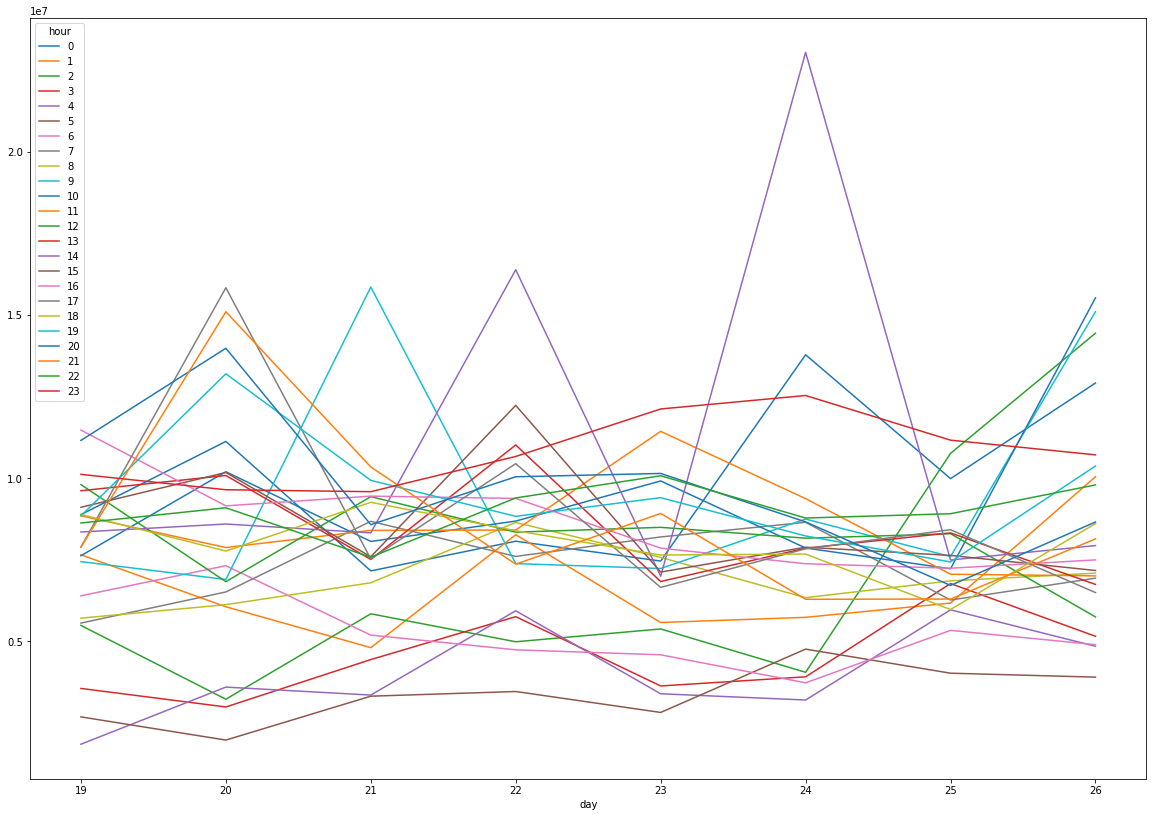

In [96]:
fig, ax = plt.subplots(figsize=(20,14))

cellular_traffic_data.groupby(['day', 'hour']).mean()['bytes'].unstack().plot(ax=ax)


In [83]:
topology_data

bs         lon        lat
0          1  111.247626  13.161971
1          2  111.209676  13.288072
2          3  111.210788  13.295707
3          4  111.203125  13.290818
4          5  111.215505  13.281345
...      ...         ...        ...
13264  13265  111.063918  13.198752
13265  13266  111.066573  13.039694
13266  13267  111.065121  13.107543
13267  13268  111.196631  13.205329
13268  13269  111.036413  13.168402

[13269 rows x 3 columns]

In [132]:
from sklearn.cluster import KMeans

In [155]:
def find_clusters(data, k):
    mat = data[['lon', 'lat']]
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(mat)
    return kmeans.labels_, kmeans.cluster_centers_

In [160]:
topology_data['cluster'], _ = find_clusters(topology_data, 10)
topology_data

bs         lon        lat  cluster
0          1  111.247626  13.161971        2
1          2  111.209676  13.288072        6
2          3  111.210788  13.295707        6
3          4  111.203125  13.290818        6
4          5  111.215505  13.281345        6
...      ...         ...        ...      ...
13264  13265  111.063918  13.198752        1
13265  13266  111.066573  13.039694        8
13266  13267  111.065121  13.107543        5
13267  13268  111.196631  13.205329        2
13268  13269  111.036413  13.168402        1

[13269 rows x 4 columns]

In [162]:

clusters = []
for i in range(0, 10):
    cluster_i = topology_data[topology_data["cluster"] == i]
    cluster_i["rrh"], centroid = find_clusters(cluster_i, 3)
    clusters.append([cluster_i, centroid])

clusters

/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/lucas/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

[[          bs         lon        lat  cluster  rrh
  71        72  111.005828  13.171396        0    0
  72        73  111.002701  13.172334        0    0
  82        83  110.999755  13.170127        0    0
  94        95  110.977784  13.166770        0    0
  129      130  110.964636  13.076711        0    2
  ...      ...         ...        ...      ...  ...
  13255  13256  110.983193  13.132282        0    2
  13258  13259  111.017989  13.097690        0    1
  13261  13262  111.027068  13.115819        0    1
  13262  13263  111.024451  13.133765        0    1
  13263  13264  111.024527  13.133718        0    1
  
  [1143 rows x 5 columns],
  array([[111.00586395,  13.1539406 ],
         [111.0280508 ,  13.12042171],
         [110.97136167,  13.12130212]])],
 [          bs         lon        lat  cluster  rrh
  84        85  111.019254  13.178659        1    1
  148      149  111.068687  13.165150        1    2
  149      150  111.068461  13.165095        1    2
  150      151  11

In [169]:
max_day_map = folium.Map(location = [topology_data['lat'].mean(), topology_data['lon'].mean()],
                 title = 'base station with max data per day')
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'gray', 'lightred', 'white', 'black', 'beige']
for i, cluster in enumerate(clusters):
    for centroid in cluster[1]:
        folium.Marker(location = [centroid[1], 
                                  centroid[0]], icon=folium.Icon(color=colors[i])).add_to(max_day_map)

max_day_map